# Training YOLOv5 custom dataset with ease

Check the full explanation on medium:

https://medium.com/mlearning-ai/training-yolov5-custom-dataset-with-ease-e4f6272148ad

### Parameter
https://github.com/AlexeyAB/darknet/wiki/CFG-Parameters-in-the-different-layers

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


In [ ]:
!nvidia-smi

Mon Jun  6 07:06:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls

CONTRIBUTING.md  export.py   models	       setup.cfg       utils
data		 hubconf.py  README.md	       train.py        val.py
detect.py	 LICENSE     requirements.txt  tutorial.ipynb


In [ ]:
%cd ..

/content


In [ ]:
!ls

yolov5


### Gunakan kode ini jika data dari gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  yolov5


### Gunakan kode ini jika download data berupa zip file

In [ ]:
import shutil
import os, sys

zip_file = "drive/MyDrive/dataset-helmet-new.zip"

if os.path.isfile(zip_file):
  shutil.unpack_archive(zip_file, "data")
else:
  print(zip_file + " not found")

### Split dataset

In [ ]:
import os, shutil, random

# preparing the folder structure

full_data_path = 'data/dataset/'
extension_allowed = '.png'
split_percentage = 90

images_path = 'data/images/'
if os.path.exists(images_path):
    shutil.rmtree(images_path)
os.mkdir(images_path)

labels_path = 'data/labels/'
if os.path.exists(labels_path):
    shutil.rmtree(labels_path)
os.mkdir(labels_path)

training_images_path = images_path + 'training/'
validation_images_path = images_path + 'validation/'
training_labels_path = labels_path + 'training/'
validation_labels_path = labels_path +'validation/'

os.mkdir(training_images_path)
os.mkdir(validation_images_path)
os.mkdir(training_labels_path)
os.mkdir(validation_labels_path)

files = []

ext_len = len(extension_allowed)

for r, d, f in os.walk(full_data_path):
    for file in f:
        if file.endswith(extension_allowed):
            strip = file[0:len(file) - ext_len]
            files.append(strip)

random.shuffle(files)

size = len(files)

split = int(split_percentage * size / 100)

print("copying training data")
for i in range(split):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, training_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, training_labels_path)

print("copying validation data")
for i in range(split, size):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, validation_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, validation_labels_path)

print("finished")

copying training data
copying validation data
finished


In [ ]:
f = open("dataset.yaml", "a")

f.write("train: ../data/images/training/\n")
f.write("val: ../data/images/validation/\n")
f.write("nc: 2\n")
f.write("names: ['Pakai Helm', 'Tidak Pakai Helm']\n")
f.close()

In [ ]:
# kalo di hp yolov5n.pt atau yolov5n6.pt

In [ ]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 10 --data ../dataset.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source 'https://youtu.be/RWGQPURn8o8'

Streaming output truncated to the last 5000 lines.
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.010s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.011s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.008s)
0: 384x640 Done. (0.012s)
0: 384x640 Done. (0.009s)
0: 384x640 Done. (0.009s)
0: 384x640 Do

In [ ]:
# !python detect.py --weights weights/last_yolov5s_custom.pt --img 416 --conf 0.4 --source ../test_infer

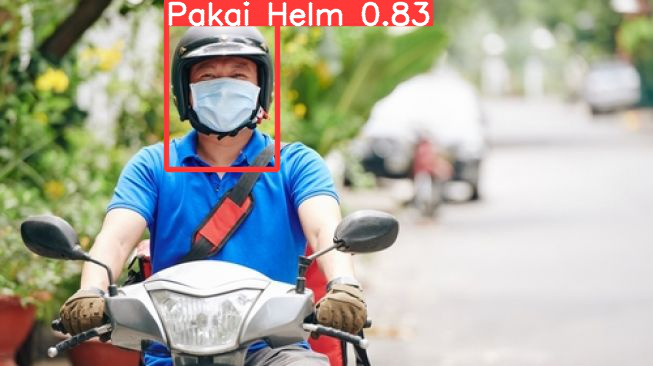

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp/1.jpg"
display(Image.open(image_path))

You can download the source original images from the author site at who retain the rights on the image: https://www.pexels.com/photo/a-group-of-skaters-with-their-skateboards-on-the-sidewalk-6337382/